In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#Reading the CSV File
data = pd.read_csv('Data/gld_price_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.shape

(2290, 6)

In [6]:
# checking if there is any missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# getting statical measure of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# corelation between variables
correlation =  data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<AxesSubplot:>

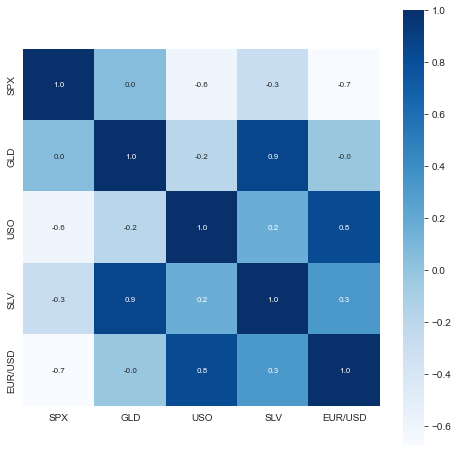

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

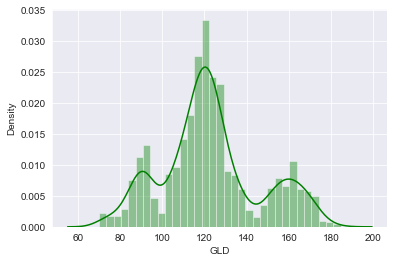

In [12]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='green')

## Splitting the Features and Target

In [13]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Training:
### Random Forest Regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(X_test, Y_test)

RandomForestRegressor(n_estimators=1000, random_state=42)

## Model Predictions:

In [18]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [19]:
print(test_data_prediction)

[122.14289978 129.90092565 127.33039228  96.89467968 117.70926127
 115.06799022 125.56924113 117.50864006 108.06311987  99.87790121
  97.27213161 168.49687697 145.11427982 116.88519759 169.4262086
  85.14370794 122.10856899 109.12188904 112.14910882 131.3471042
 124.33756164 114.92091842 116.85882092 109.49112028 109.79749922
 125.40190116 121.73556968 113.54326827 114.33417071 126.39321039
 147.09476761  90.15433126 166.9459416  114.466622   112.98823054
 120.61594193 140.69477262 160.84819511 173.74848805 151.84199289
 117.34195962 112.84813113 121.50405815 113.67656093 121.56334882
 107.67295782  88.38602701 114.17079107 130.2528287  117.8792386
 100.95545875 129.77238146 106.74642828 160.51838354 129.33350126
 116.99078173 145.16422005 130.44206176  95.63643218 123.80441063
 115.56224201  86.31137822 105.05918879 113.58026097  85.4195582
 122.26779079 116.66765115 113.09760284 164.93602609  91.82643793
  80.8607286  157.54295821 154.08894879 106.18520875 138.70719309
 109.76135083 

In [20]:
# R squared error
print('R-Squared Error:',metrics.r2_score(Y_test, test_data_prediction))

R-Squared Error: 0.9971695185635744


## scikit-learn

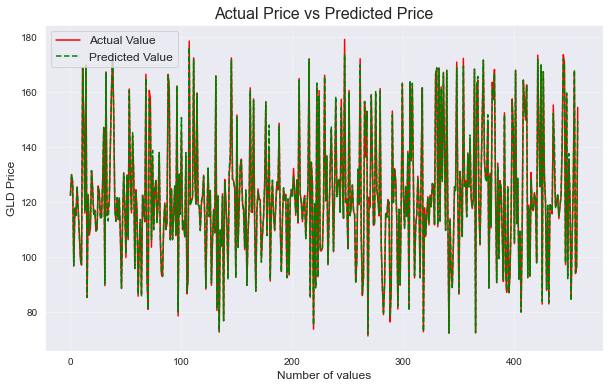

R-Squared Error: 0.9971695185635744


In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize=(10, 6))
plt.plot(Y_test, color='red', linestyle='-', label='Actual Value')
plt.plot(test_data_prediction, color='green', linestyle='--', label='Predicted Value')

plt.title('Actual Price vs Predicted Price', fontsize=16)
plt.xlabel('Number of values', fontsize=12)
plt.ylabel('GLD Price', fontsize=12)

# Add a legend only if there are labeled elements
if len(plt.gca().get_legend_handles_labels()[0]) > 0:
    plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

r2_error = metrics.r2_score(Y_test, test_data_prediction)
print('R-Squared Error:', r2_error)

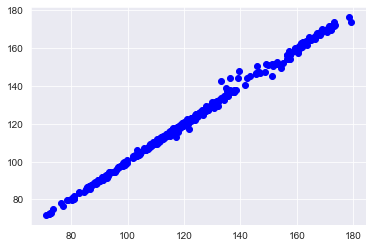

In [27]:
# Compare the Actual Values and Predicted Values in a Plot
plt.scatter(Y_test,test_data_prediction,color='blue')

In [28]:
Y_test = list(Y_test)

In [29]:
test_data_prediction = list(test_data_prediction)
print(test_data_prediction)

[122.14289978400156, 129.90092565400147, 127.33039228300102, 96.89467968099959, 117.70926126500098, 115.06799022199948, 125.56924113400125, 117.50864005799873, 108.06311987499862, 99.87790120900083, 97.272131606001, 168.49687696700045, 145.11427982300089, 116.8851975859989, 169.42620860400035, 85.14370793599898, 122.10856898700155, 109.1218890350006, 112.14910881900131, 131.34710419899994, 124.33756164100129, 114.92091841699829, 116.85882092199897, 109.49112027599976, 109.79749921800028, 125.40190115899846, 121.73556967799914, 113.5432682730017, 114.33417070700096, 126.39321039499819, 147.0947676149994, 90.15433125600093, 166.94594159899924, 114.46662199699891, 112.98823054099807, 120.61594192700066, 140.69477261900008, 160.84819510600224, 173.74848805200088, 151.84199289299988, 117.34195961899944, 112.84813112599925, 121.50405815299827, 113.67656093499866, 121.56334882100077, 107.67295782299901, 88.38602701199939, 114.17079107300088, 130.2528286959992, 117.87923860400065, 100.95545875